In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## a. Reading, coloring, and displaying images

### Reading image

In [4]:
image= cv2.imread('Downloads/marie-martin-UZaDDDVDKCY-unsplash.jpg')
print(image.shape)

(960, 640, 3)


### Displaying image

using `matplotlib` to read image inline in the notebook. OpenCV reads the image in Blue Green Red (BGR) while `matplotlib` read image in RGB. So, we need to convert the image into RGB so that `matplotlib` can render the image properly

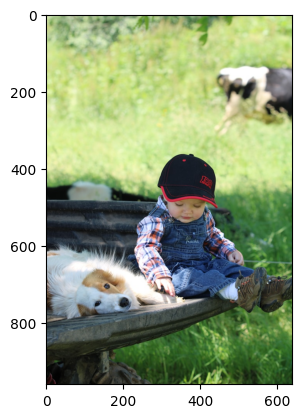

In [7]:
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

### Visualizing color channels

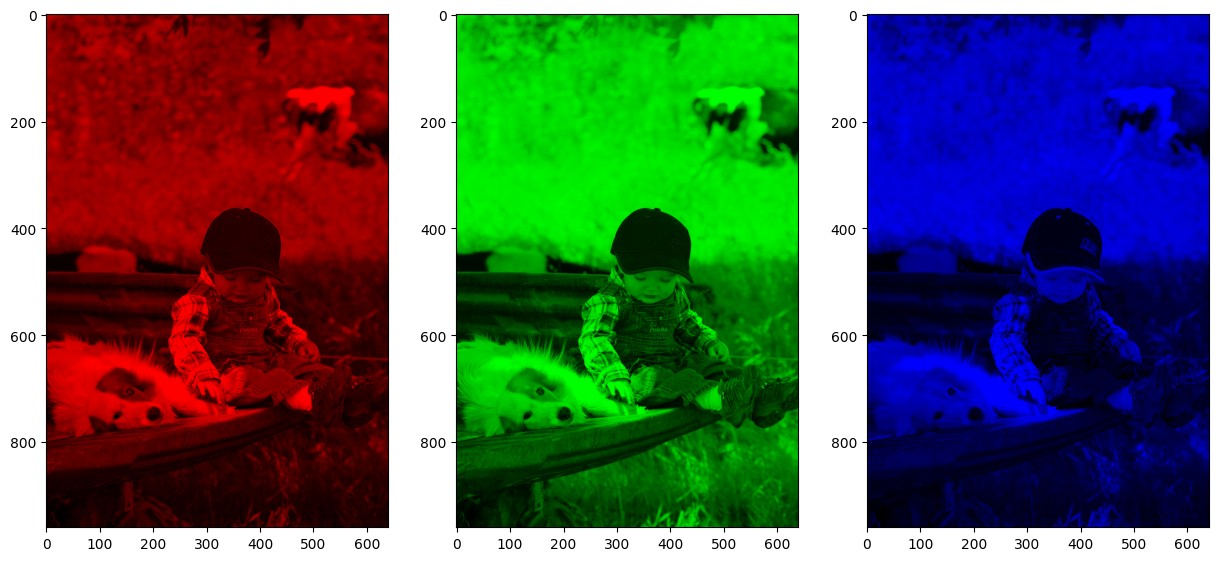

In [9]:
fig, ax= plt.subplots(1,3,figsize=(15,15))
r=image.copy()
# set blue and green channel to 0
r[:,:,1]=0
r[:,:,2]=0

g=image.copy()
# set blue and red channel to 0
g[:,:,0]=0
g[:,:,2]=0

b=image.copy()
# set red and green channel to 0
b[:,:,0]=0
b[:,:,1]=0

ax[0].imshow(r)
ax[1].imshow(g)
ax[2].imshow(b)

### Edge detection

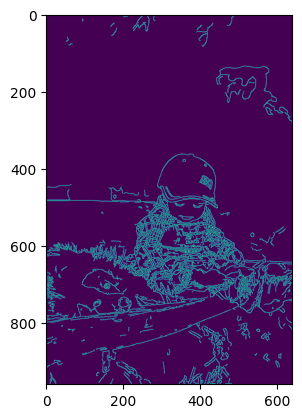

In [11]:
# calculate the edges using canny algorithm
edges=cv2.Canny(image,100,200)
#plot the edges
plt.imshow(edges)

## b. Images

Using yolo model to 

In [14]:
pip install cython pillow>=7.0.0 numpy>=1.18.1 opencv-python>=4.1.2 torch>=1.9.0 --extra-index-url https://download.pytorch.org/whl/cu102 torchvision>=0.10.0 --extra-index-url https://download.pytorch.org/whl/cu102 pytest==7.1.3 tqdm==4.64.1 scipy>=1.7.3 matplotlib>=3.4.3 mock==4.0.3

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install imageai --upgrade

Note: you may need to restart the kernel to use updated packages.


In [16]:
from imageai.Detection import ObjectDetection
# Inisialisasi detektor
detector = ObjectDetection()

# Menentukan tipe model dan memuat file model
detector.setModelTypeAsYOLOv3()
detector.setModelPath("yolov3.pt")
detector.loadModel()

# Deteksi objek pada gambar
detections = detector.detectObjectsFromImage(
    input_image='evan-krause-bnQs0mip6HQ-unsplash.jpg',
    output_image_path='city_new.jpg',
    minimum_percentage_probability=30
)

# Menampilkan hasil deteksi
for eachObject in detections:
    print(eachObject['name'], ":", eachObject['percentage_probability'], ":", eachObject['box_points'])
    print('-----------------------------')


D:\anaconda\Lib\site-packages\imageai\Detection\__init__.py:255: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(self.__model_path, map_location=self._

person : 100.0 : [290, 263, 327, 369]
-----------------------------
person : 100.0 : [255, 267, 292, 368]
-----------------------------
person : 100.0 : [135, 266, 174, 366]
-----------------------------
person : 100.0 : [360, 267, 389, 366]
-----------------------------
person : 99.91 : [326, 274, 373, 371]
-----------------------------
person : 99.96 : [207, 262, 247, 371]
-----------------------------
person : 99.98 : [406, 270, 440, 373]
-----------------------------
umbrella : 99.98 : [212, 223, 299, 308]
-----------------------------
handbag : 92.85 : [406, 312, 420, 333]
-----------------------------


In [17]:
detections[:3]

[{'name': 'person',
  'percentage_probability': 100.0,
  'box_points': [290, 263, 327, 369]},
 {'name': 'person',
  'percentage_probability': 100.0,
  'box_points': [255, 267, 292, 368]},
 {'name': 'person',
  'percentage_probability': 100.0,
  'box_points': [135, 266, 174, 366]}]

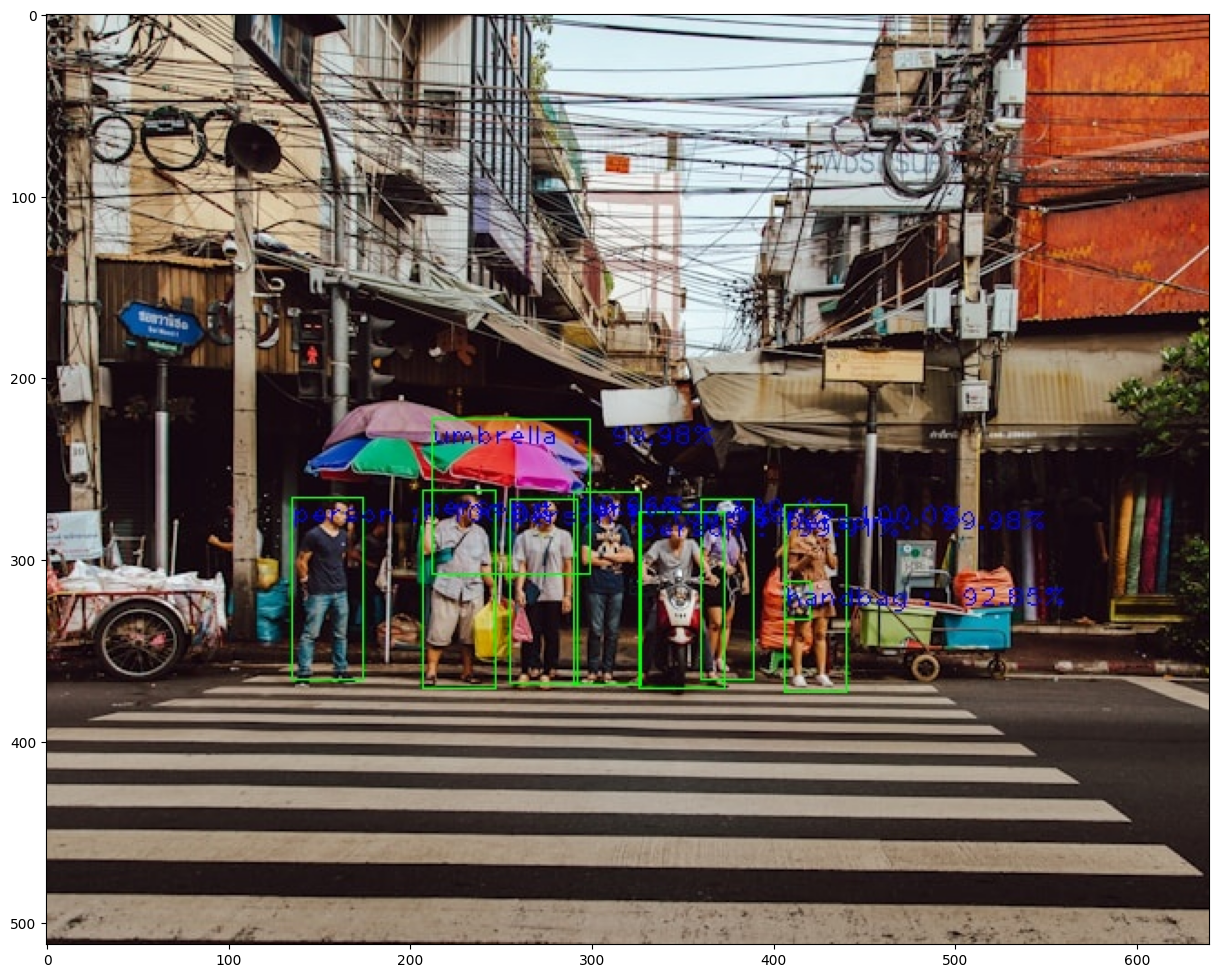

In [18]:
new_image=cv2.imread('city_new.jpg')
new_image_rgb=cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.imshow(new_image_rgb)

### Crop image

In [20]:
def crop(img, box_points):
    # Make sure that coordinate is integer
    x1, y1, x2, y2 = map(int, box_points)
    crop_img = img[y1:y2, x1:x2]
    return crop_img


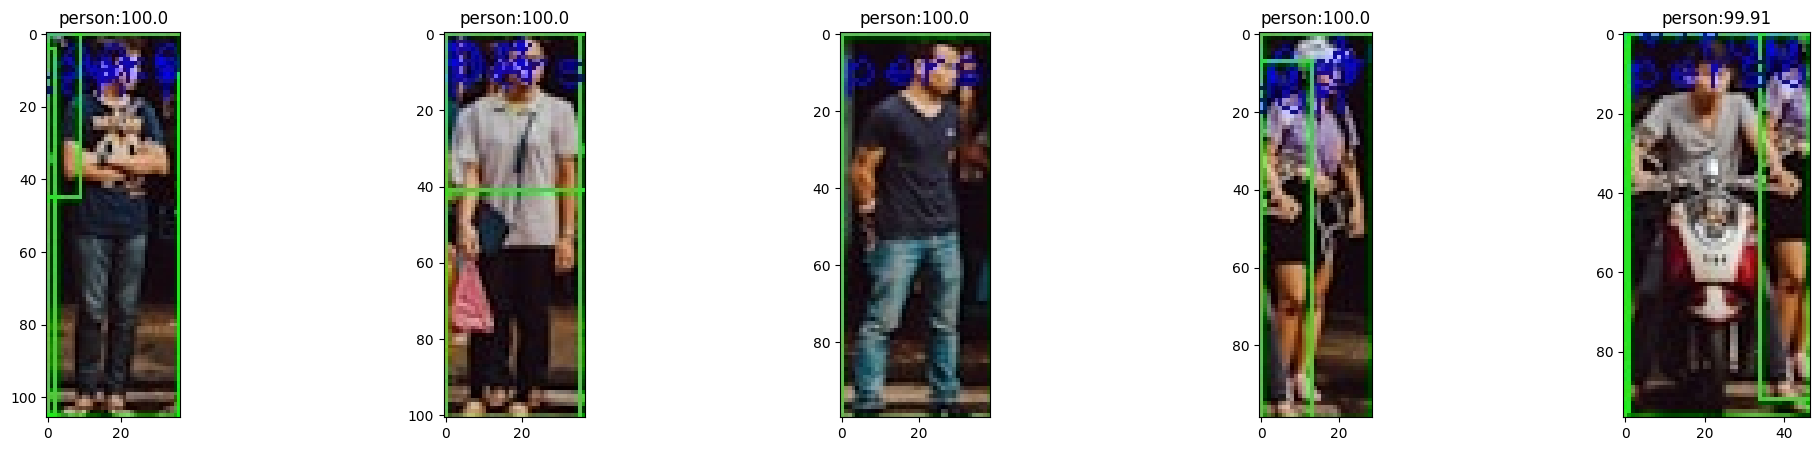

In [40]:
new_image=cv2.imread('city_new.jpg')
new_image=cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,5,figsize=(25,5))
count=0

for d in detections[0:5]:
    crop_img=crop(new_image,d['box_points'])
    ax[count].set_title(d['name'] + ":" + str(round(d['percentage_probability'],2)))
    ax[count].imshow(crop_img)
    count+=1

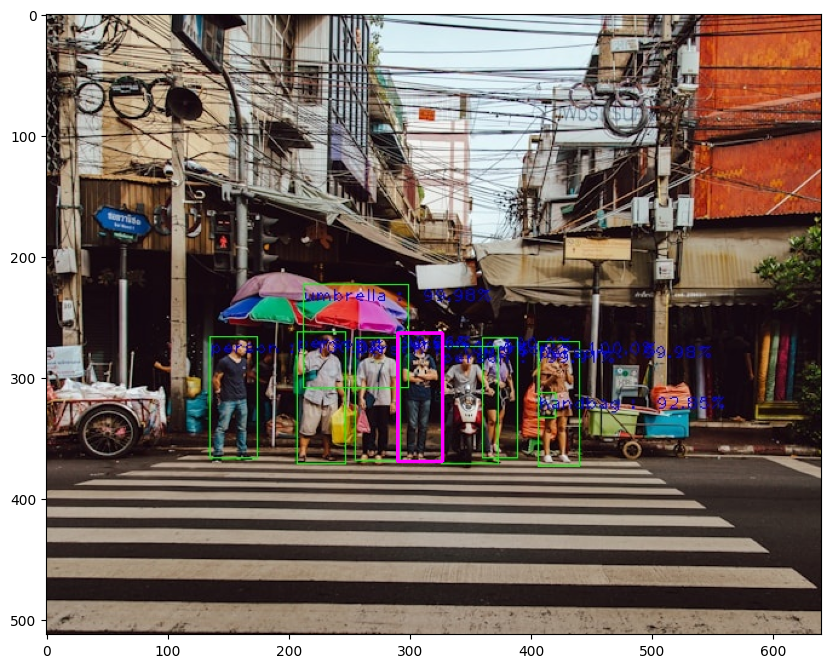

In [46]:
def get_coordinates(box_points):
    ' taking box_points in the form of [x1,y1,x2,y2] into tuple (x1,y1) (x2,y2) as the coordinates'
    x1=box_points[0]
    y1=box_points[1]
    x2=box_points[2]
    y2=box_points[3]
    return (x1,y1), (x2,y2)

object0=detections[0]
# Get the coordinates for the bounding box
upper_left, lower_right = get_coordinates(object0['box_points'])

# Calculate the center and radius
center = ((upper_left[0] + lower_right[0]) // 2, (upper_left[1] + lower_right[1]) // 2)  # Midpoint of the diagonal
radius = max((lower_right[0] - upper_left[0]) // 2, (lower_right[1] - upper_left[1]) // 2)  # Half of the max side length

# Draw a rectangle using the top-left and bottom-right points
img_text = cv2.rectangle(new_image, upper_left, lower_right, (255, 0, 255), 2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_text)

### videos

In [49]:
from imageai.Detection import VideoObjectDetection
import os
detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolov3.pt"))
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "videoplayback.mp4"),
                            output_file_path=os.path.join(execution_path, "traffic_detected")
                            , frames_per_second=20, log_progress=True)
print(video_path)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

In [63]:
#read the video file
cap=cv2.VideoCapture('traffic_detected.mp4')
while cap.isOpened() :
    #check if the video is read correctly
    ret, frame = cap.read()
    #if frame is read correctly then ret is true
    if not ret :
        print("can't receive frame. Exiting....")
        break
    frame_rgb=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    frame_rgb_resized=cv2.resize(frame_rgb,(960,540))
    cv2.imshow('frame',frame_rgb_resized)
    #if we press 'q', the video is stopped and the window is closed. waitkey() is waiting time until 'q' is pressed.
    if cv2.waitKey(30)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**the output :**
- 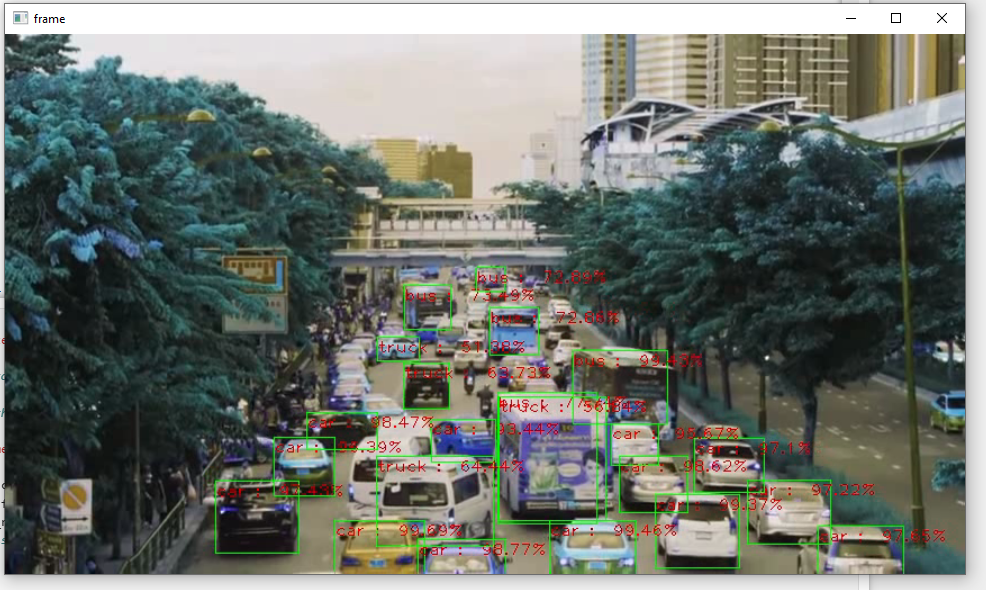

Object detection is often used to count objects or track movement throughout a video

In [76]:
#define variable to store the frame_counts dict for each row
frame_counts=[]
def forFrame(frame_number, output_arrays, count_arrays):
    frame_counts.append(count_arrays)
    #the first 5 frames, we'll print the data that can be collected for each frame
    if frame_number <=5 : 
        print("FOR FRAME " , frame_number)
        print("Output for each object : ", output_arrays)
        print("Output count for unique objects : ",count_arrays)
        print("------------END OF A FRAME --------------")
video_detector = VideoObjectDetection()
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath(os.path.join(execution_path, "yolov3.pt"))
video_detector.loadModel()


video_detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "2796080-uhd_3840_2160_25fps.mp4"),
                                      output_file_path=os.path.join(execution_path, "dog_detected") ,
                                      frames_per_second=20, per_frame_function=forFrame,
                                      minimum_percentage_probability=60)


FOR FRAME  1
Output for each object :  [{'name': 'person', 'percentage_probability': 99.87, 'box_points': [1537, 29, 2395, 1740]}, {'name': 'dog', 'percentage_probability': 87.07, 'box_points': [729, 1228, 1512, 1768]}, {'name': 'chair', 'percentage_probability': 76.62, 'box_points': [0, 745, 397, 1608]}]
Output count for unique objects :  {'person': 1, 'dog': 1, 'chair': 1}
------------END OF A FRAME --------------
FOR FRAME  2
Output for each object :  [{'name': 'person', 'percentage_probability': 99.86, 'box_points': [1548, 28, 2393, 1744]}, {'name': 'dog', 'percentage_probability': 97.88, 'box_points': [752, 1229, 1526, 1764]}, {'name': 'chair', 'percentage_probability': 83.55, 'box_points': [0, 746, 393, 1614]}]
Output count for unique objects :  {'person': 1, 'dog': 1, 'chair': 1}
------------END OF A FRAME --------------
FOR FRAME  3
Output for each object :  [{'name': 'person', 'percentage_probability': 99.89, 'box_points': [1564, 15, 2402, 1762]}, {'name': 'dog', 'percentage_p

'C:\\Users\\PED\\dog_detected.mp4'

In [78]:
len(frame_counts)

350

In [80]:
frame_counts[:5]

[{'person': 1, 'dog': 1, 'chair': 1},
 {'person': 1, 'dog': 1, 'chair': 1},
 {'person': 1, 'dog': 1, 'chair': 1},
 {'person': 1, 'dog': 1, 'chair': 1},
 {'person': 1, 'dog': 1, 'chair': 1, 'pottedplant': 1}]

In [82]:
unique_labels=set()
for frame_objects in frame_counts :
    for label in frame_objects.keys() :
        unique_labels.add(label)
unique_labels

{'bench',
 'cat',
 'chair',
 'clock',
 'diningtable',
 'dog',
 'person',
 'pottedplant',
 'teddy bear',
 'vase'}

In [86]:
import pandas as pd
counts={}
for label in unique_labels:
    counts[label]=0

#loop through each frame and count the label 
for frame_objects in frame_counts:
    for label in unique_labels:
        if label in frame_objects.keys():
            counts[label]+=1

df_counts= pd.DataFrame({'Labels':list(counts.keys()),'Number of Frames' :list(counts.values())})
df_counts.sort_values(by='Number of Frames', ascending= False,inplace=True)
df_counts.reset_index(inplace=True, drop=True)
df_counts

Labels  Number of Frames
0       person               350
1  pottedplant               138
2          dog               136
3        chair               105
4  diningtable                71
5        bench                53
6   teddy bear                39
7          cat                18
8         vase                 3
9        clock                 2

<Axes: title={'center': 'Number of Frames that Contain each label'}, xlabel='Labels', ylabel='Number of Frames'>

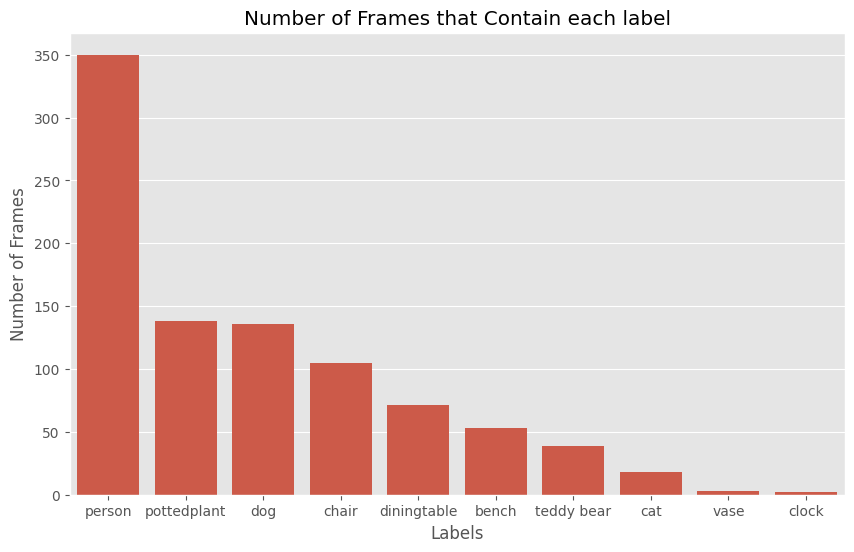

In [96]:
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Number of Frames that Contain each label')
sns.barplot(x='Labels',y='Number of Frames', data= df_counts)